In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import importlib
from sys import version

import cbgt
from src.plot import *

print(f"Python: {version}")
print(f"  >      numpy: {np.__version__}")
print(f"  > matplotlib: {mpl.__version__}")


Python: 3.12.9 (main, Feb  4 2025, 14:38:38) [GCC 14.2.1 20241116]
  >      numpy: 2.2.3
  > matplotlib: 3.10.1


In [2]:
%%time
np.random.seed(69)

n_gpe, n_stn = 10, 10
i_app_gpe = lambda t, n: -1.2

c_g_s = np.zeros((n_gpe, n_stn), dtype=np.float64)
c_s_g = np.zeros((n_stn, n_gpe), dtype=np.float64)
c_g_g = (~np.eye(n_gpe, dtype=np.bool)).astype(np.float64)

for idx_g in range(n_gpe):
    ids_s = np.random.choice(np.arange(n_stn), size=3, replace=False)
    c_g_s[idx_g, ids_s] = 1

c_s_g[np.arange(n_stn), np.random.permutation(n_gpe)] = 1

rt = cbgt.RubinTerman(dt=0.01, total_t=2, i_app_gpe=i_app_gpe, 
                      parameters_settings="episodic",
                      c_g_s=c_g_s, c_s_g=c_s_g, c_g_g=c_g_g
)
data = rt.run()

Simulation completed!
CPU times: user 1.38 s, sys: 218 ms, total: 1.6 s
Wall time: 1.58 s


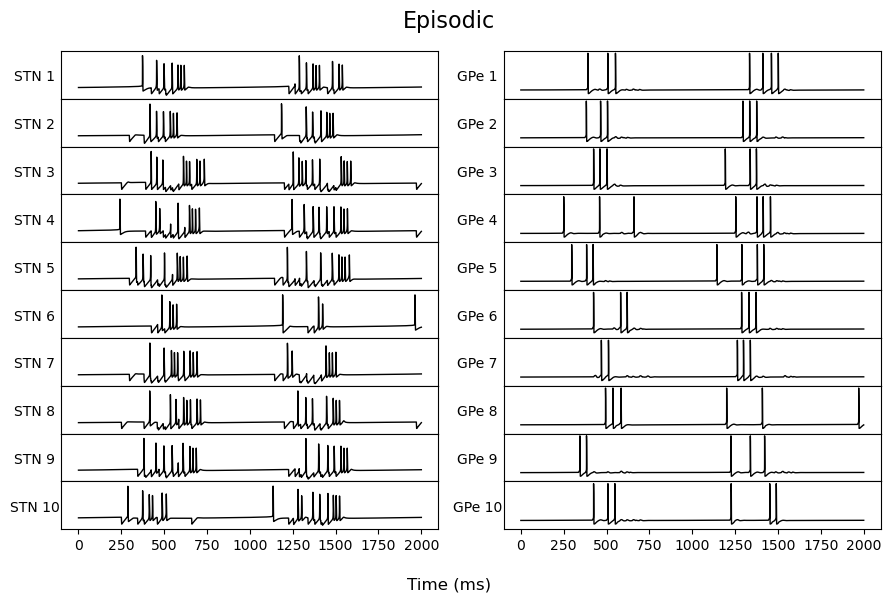

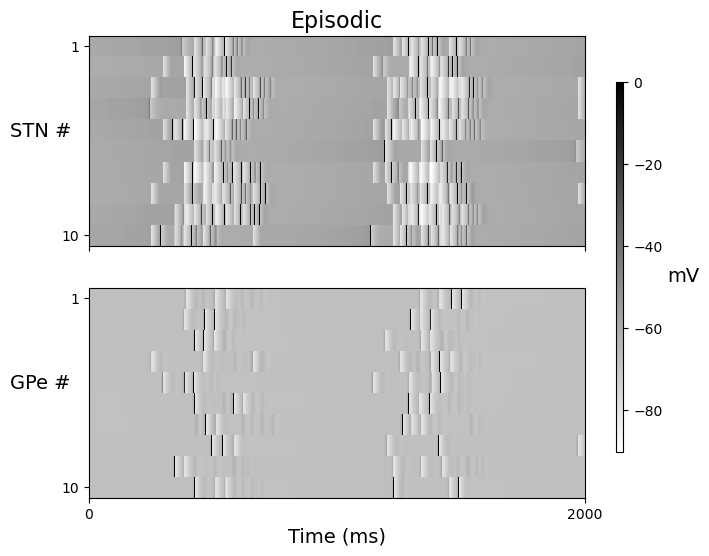

In [4]:
plot_time_activity([data["stn"]["v"], data["gpe"]["v"]], ["STN", "GPe"], rt.dt, title="Episodic")

In [5]:
%%time
# np.random.seed(69)

n_gpe, n_stn = 10, 10
i_app_gpe = lambda t, n: -1.2

c_g_s = np.zeros((n_gpe, n_stn), dtype=np.float64)
c_s_g = np.zeros((n_stn, n_gpe), dtype=np.float64)
c_g_g = (~np.eye(n_gpe, dtype=np.bool)).astype(np.float64)

c_s_g[0, [0,1,-1]] = 1
for i in range(n_stn-1):
    c_s_g[i+1] = np.roll(c_s_g[i], 1)

c_g_s[0, [0,1,2,-1,-2]] = 1
for i in range(n_gpe-1):
    c_g_s[i+1] = np.roll(c_g_s[i], 1) 

rt = cbgt.RubinTerman(dt=0.01, total_t=2, i_app_gpe=i_app_gpe, 
                      parameters_settings="wave",
                      c_g_s=c_g_s, c_s_g=c_s_g, c_g_g=c_g_g
)
data = rt.run()

Simulation completed!
CPU times: user 1.38 s, sys: 252 ms, total: 1.64 s
Wall time: 1.62 s


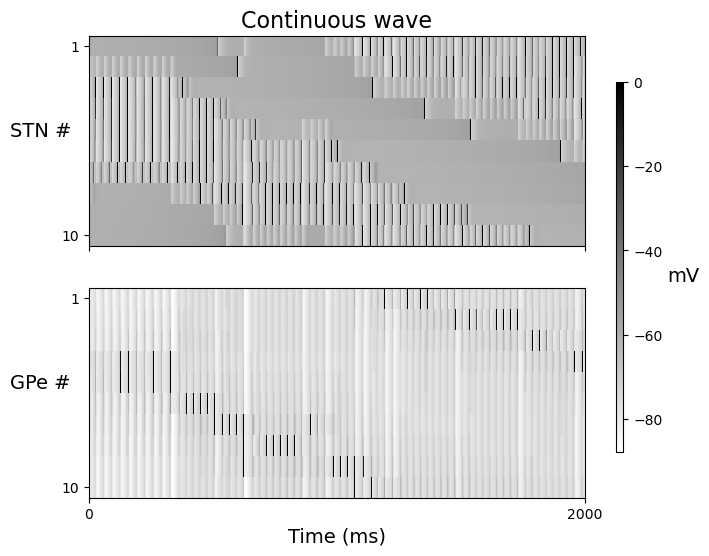

In [6]:
plot_time_activity([data["stn"]["v"], data["gpe"]["v"]], ["STN", "GPe"], rt.dt, title="Continuous wave")

Simulation completed!


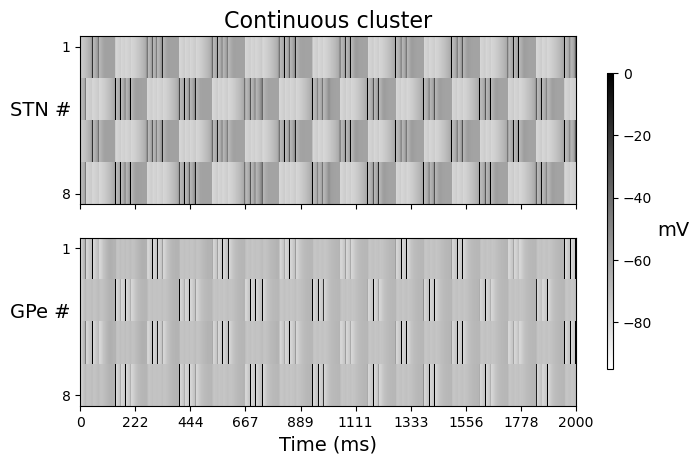

CPU times: user 1.54 s, sys: 14.9 ms, total: 1.55 s
Wall time: 1.54 s


In [26]:
%%time
importlib.reload(cbgt)
# np.random.seed(69)

n_gpe, n_stn = 8, 8
i_app_gpe = lambda t, n: -.6

c_g_s = np.zeros((n_gpe, n_stn), dtype=np.float64)
c_s_g = np.eye((n_stn), dtype=np.float64)
c_g_g = np.zeros((n_gpe, n_gpe), dtype=np.float64)

c_g_g[0, [1,-1]] = 1
for i in range(n_stn-1):
    c_g_g[i+1] = np.roll(c_g_g[i], 1)

c_g_s[0, [2,-2]] = 1
for i in range(n_stn-1):
    c_g_s[i+1] = np.roll(c_g_s[i], 1)

rt = cbgt.RubinTerman(dt=0.01, total_t=2, i_app_gpe=i_app_gpe, num_gpe=n_gpe, num_stn=n_stn,
                      parameters_settings="cluster",
                      c_g_s=c_g_s, c_s_g=c_s_g, c_g_g=c_g_g
)
data = rt.run()
plot_time_activity([data["stn"]["v"], data["gpe"]["v"]], ["STN", "GPe"], rt.dt, title="Continuous cluster", xticks_dist=1000)